In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plotting import fig_saver

In [3]:
sf = fig_saver("./figures")

In [4]:
c15 = pd.read_csv("cristallo15.csv", sep="\s+")

In [5]:
v13 = pd.read_csv("ventura13_data.txt", sep="\s+")

In [6]:
k10 = pd.read_csv("karakas10_data.csv", sep="\s+", skiprows=68)

In [29]:
c15.MASS.unique()

array([1.3, 1.5, 2. , 2.5, 3. , 4. , 5. , 6. ])

In [31]:
v13.mass.unique()

array([1.5, 2. , 2.5, 3. , 3.5, 4. , 4.2, 4.5, 4.7, 5. , 5.5, 6. , 6.5,
       7. , 7.2, 7.5, 6.3, 8. ])

In [34]:
k10.M0.unique()

array(['4.50', '5.50', '2.10', '1.00', '1.50', '1.90', '3.00', '3.50',
       '4.00', '5.00', '6.00'], dtype=object)

In [38]:
c15.METALLICITY.unique()

array([2.0e-05, 5.0e-05, 1.0e-04, 3.0e-04, 1.0e-03, 2.0e-03, 3.0e-03,
       6.0e-03, 8.0e-03, 1.0e-02, 1.4e-02, 2.0e-02])

In [41]:
v13.Z.unique()

array([0.0003, 0.001 , 0.008 ])

In [92]:
pd.DataFrame.groupby?

In [145]:
k10.Z0.unique()

array([0.02  , 0.008 , 0.004 , 0.0001])

In [44]:
k10.columns

Index(['M0', 'Z0', 'Pulse', 'Mcore', 'Mcsh', 'tcsh', 'Ddredge', 'lam',
       'lam.dup', 'T(He-sh)', 'Tbce', 'T(H-sh)', 'iPulse', 'Mtot', 'Lmax',
       'LHe.max', 'Rmax', 'Mbol', 'Teff', 'Yields'],
      dtype='object')

In [45]:
v13.columns

Index(['Z', 'mass', 't_evo', 'Np', 't_i', 'Mc1PT', 'M_c', 'T_bce'], dtype='object')

In [150]:
M = {}
M["v13"] = v13.mass
M["k10"] = k10.M0
M["c15"] = c15.MASS

Z = {}
Z["v13"] = v13.Z
Z["k10"] = k10.Z0
Z["c15"] = c15.METALLICITY

Np = {}
Np["v13"] = v13.Np
Np["k10"] = k10.groupby(["M0", "Z0"]).max("Pulse")

Tbce = {}
Tbce["k10"] = k10.groupby(["M0", "Z0"]).max("Tbce")

In [170]:
c15

,MASS,METALLICITY,IRV,13C,Pocket,TP,DTIP,DMTDU,TMAX_CS
0,1.3,0.00002,0,STANDARD,9,102400.0,0.000000,276300000.0,NaN
1,1.3,0.00005,0,STANDARD,17,57590.0,0.000000,289100000.0,NaN
2,1.3,0.00010,0,STANDARD,15,60250.0,0.000000,286800000.0,NaN
3,1.3,0.00030,0,STANDARD,11,94230.0,0.000000,286100000.0,NaN
4,1.3,0.00100,0,STANDARD,10,107500.0,0.000000,194000000.0,NaN
...,...,...,...,...,...,...,...,...,...
81,6.0,0.00600,0,STANDARD,24,2998.0,0.000021,343300000.0,NaN
82,6.0,0.00800,0,STANDARD,20,3833.0,0.000082,339700000.0,NaN
83,6.0,0.01000,0,STANDARD,17,4849.0,0.000233,336300000.0,NaN
84,6.0,0.01400,0,STANDARD,18,4094.0,0.000003,329100000.0,NaN


In [175]:
k10.groupby(["M0", "Z0"]).max("Tbce")

Pulse  Mcore     Mcsh   tcsh  Ddredge    lam   lam.dup  \
M0  Z0                                                               
1.0 0.0001     26  0.723  0.04470  648.1  0.00230  0.180  0.060037   
1.5 0.0001     18  0.657  0.03820  371.0  0.00490  0.512  0.253914   
1.9 0.0001     24  0.680  0.02530  261.3  0.00997  0.803  0.488312   
2.1 0.0040     20  0.647  0.03410  431.4  0.00779  0.682  0.372438   
3.0 0.0001     20  0.812  0.00898   53.2  0.00765  1.020  0.859707   
3.5 0.0001     27  0.854  0.00663   48.9  0.00555  1.060  0.862659   
4.0 0.0001     37  0.874  0.00510   77.1  0.00463  0.975  1.214986   
4.5 0.0001     41  0.897  0.00406   78.0  0.00352  0.967  1.039225   
    0.0040     50  0.874  0.00522   37.7  0.00452  0.986  0.869020   
    0.0080     38  0.861  0.00588   52.0  0.00496  0.980  0.852440   
    0.0200     21  0.853  0.00577   49.9  0.00432  0.989  0.760184   
5.0 0.0001     56  0.929  0.00336   30.5  0.00308  0.966  0.916480   
5.5 0.0001     77  0.966  0.00289   30.6  0.00251  1.020  0.925049   
    0.0040     71  0.932  0.00349   31.3  0.00299  0.977  0.855286   
    0.0080     56  0.907  0.00440   31.5  0.00375  1.020  0.886247   
    0.0200     36  0.900  0.00419   37.8  0.00338  0.962  0.807810   
6.0 0.0001    109  1.008  0.00231   27.1  0.00225  1.690  0.974942   

               T(He-sh)         Tbce      T(H-sh)    iPulse   Mtot      Lmax  \
M0  Z0                                                                         
1.0 0.0001  298000000.0    1450000.0   74200000.0  495000.0  0.924   12200.0   
1.5 0.0001  282000000.0    3430000.0   67600000.0  356000.0  1.469   11000.0   
1.9 0.0001  300000000.0    7370000.0   70800000.0  158000.0  1.882   14200.0   
2.1 0.0040  290000000.0    3810000.0   64100000.0  176000.0  2.073   10300.0   
3.0 0.0001  354000000.0   39600000.0   84800000.0   29300.0  2.965   20400.0   
3.5 0.0001  370000000.0   75900000.0   89900000.0   18700.0  3.459   28400.0   
4.0 0.0001  353000000.0   82900000.0   92500000.0   12500.0  3.963   38300.0   
4.5 0.0001  352000000.0   87200000.0   95000000.0   10400.0  4.456   44200.0   
    0.0040  366000000.0   78700000.0   85300000.0   12200.0  4.468   34200.0   
    0.0080  372000000.0   73800000.0   82800000.0   15500.0  4.471   29700.0   
    0.0200  349000000.0   46700000.0   78400000.0   14000.0  4.476   24200.0   
5.0 0.0001  363000000.0   92500000.0   98600000.0    7520.0  4.968   53300.0   
5.5 0.0001  369000000.0   98200000.0  103000000.0    6020.0  5.472  944000.0   
    0.0040  370000000.0   87500000.0   91900000.0    9770.0  5.461   47300.0   
    0.0080  370000000.0   83300000.0   87900000.0   10200.0  5.456   40500.0   
    0.0200  367000000.0   79300000.0   85100000.0    8790.0  5.463   36100.0   
6.0 0.0001  379000000.0  105000000.0  111000000.0    3790.0  5.974  282000.0   

                 LHe.max   Rmax  Mbol  Teff  
M0  Z0                                       
1.0 0.0001  7.060000e+07  260.0 -2.77  4701  
1.5 0.0001  5.820000e+07  418.0 -3.58  4745  
1.9 0.0001  2.200000e+08  496.0 -3.95  4677  
2.1 0.0040  1.250000e+08  449.0 -3.49  4255  
3.0 0.0001  1.790000e+09  507.0 -5.29  4525  
3.5 0.0001  1.410000e+09  503.0 -5.50  4530  
4.0 0.0001  7.740000e+08  401.0 -5.66  4540  
4.5 0.0001  4.160000e+08  426.0 -5.73  4559  
    0.0040  8.020000e+08  667.0 -5.91  3769  
    0.0080  1.040000e+09  690.0 -5.80  3630  
    0.0200  3.760000e+08  807.0 -5.86  3337  
5.0 0.0001  5.420000e+08  465.0 -5.91  4569  
5.5 0.0001  8.580000e+08  508.0  0.00  4574  
    0.0040  6.880000e+08  708.0 -6.14  3843  
    0.0080  1.120000e+09  756.0 -6.01  3643  
    0.0200  4.630000e+08  836.0 -6.12  3413  
6.0 0.0001  5.420000e+08  554.0 -6.28  4575

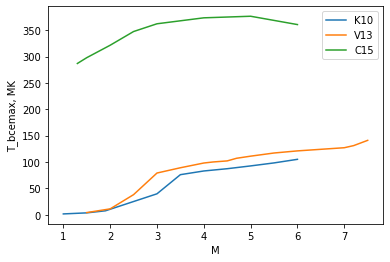

In [205]:
filt = k10[k10.Z0 == 0.0001]
df = filt.groupby(["M0"]).max("Tbce")
plt.plot(df.index, df.Tbce/10**6, label="K10")
plt.xlabel("M")
plt.ylabel("T_bcemax, MK")

df = v13[v13.Z == 0.0003]
plt.plot(df.mass, df.T_bce/1e6, label="V13")
plt.xlabel("M")
plt.ylabel("T_bcemax, MK")

df = c15[c15.METALLICITY == 0.0001]
plt.plot(df.MASS, df.TMAX_CS/1e6, label="C15")

plt.legend()

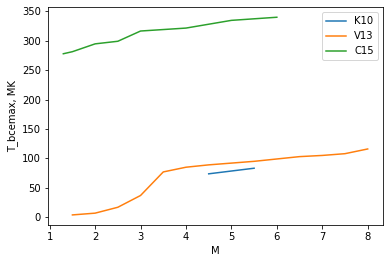

In [214]:
filt = k10[k10.Z0 == 0.008]
df = filt.groupby(["M0"]).max("Tbce")
plt.plot(df.index, df.Tbce/10**6, label="K10")
plt.xlabel("M")
plt.ylabel("T_bcemax, MK")

df = v13[v13.Z == 0.008]
plt.plot(df.mass, df.T_bce/1e6, label="V13")
plt.xlabel("M")
plt.ylabel("T_bcemax, MK")

df = c15[c15.METALLICITY == 0.008]
plt.plot(df.MASS, df.TMAX_CS/1e6, label="C15")

plt.legend()

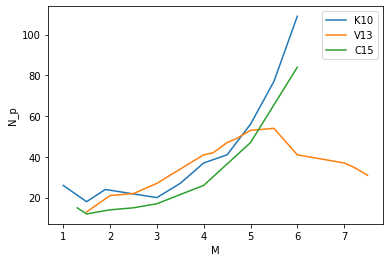

In [217]:
filt = k10[k10.Z0 == 0.0001]
df = filt.groupby(["M0"]).max("Pulse")
plt.plot(df.index, df.Pulse, label="K10")
plt.xlabel("M")
plt.ylabel("N_p")

df = v13[v13.Z == 0.0003]
plt.plot(df.mass, df.Np, label="V13")

df = c15[c15.METALLICITY == 0.0001]
plt.plot(df.MASS, df.TP, label="C15")

plt.legend()
sf("m_np")

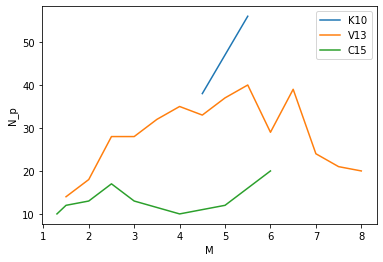

In [203]:
filt = k10[k10.Z0 == 0.008]
df = filt.groupby(["M0"]).max("Pulse")
plt.plot(df.index, df.Pulse, label="K10")
plt.xlabel("M")
plt.ylabel("N_p")

df = v13[v13.Z == 0.008]
plt.plot(df.mass, df.Np, label="V13")

df = c15[c15.METALLICITY == 0.008]
plt.plot(df.MASS, df.TP, label="C15")

plt.legend()

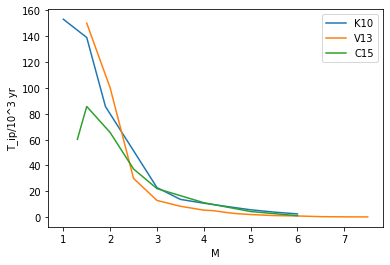

In [216]:
filt = k10[k10.Z0 == 0.0001]
df = filt.groupby(["M0"]).mean("iPulse")
plt.plot(df.index, df.iPulse/1e3, label="K10")
plt.xlabel("M")
plt.ylabel("T_ip/10^3 yr")

df = v13[v13.Z == 0.0003]
plt.plot(df.mass, df.t_i/1e3, label="V13")

df = c15[c15.METALLICITY == 0.0001]
plt.plot(df.MASS, df.DTIP/1e3, label="C15")

plt.legend()

sf("m_tip")

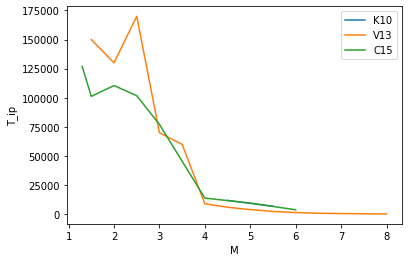

In [213]:
filt = k10[k10.Z0 == 0.008]
df = filt.groupby(["M0"]).mean("iPulse")
plt.plot(df.index, df.iPulse, label="K10")
plt.xlabel("M")
plt.ylabel("T_ip")

df = v13[v13.Z == 0.008]
plt.plot(df.mass, df.t_i, label="V13")

df = c15[c15.METALLICITY == 0.008]
plt.plot(df.MASS, df.DTIP, label="C15")

plt.legend()

sf("m_tip")